In [6]:
#Importing gym environment
! pip install gym

In [17]:
#Importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import time

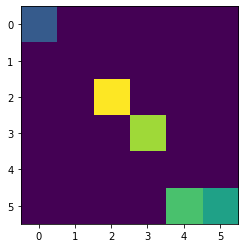

In [156]:
#Defining a 10*10 grid along with start and terminal positions
grid  =  np.zeros((6,6))
start_pos = [0,0]
terminal_pos = [5, 5]
grid[tuple(start_pos)] = 2
grid[tuple(terminal_pos)] = 4
agent_pos = [0,0]
reward_pos_1 = [5,4]
reward_pos_2 = [3,3]
reward_pos_3 = [2,2]
grid[tuple(reward_pos_1)] = 5
grid[tuple(reward_pos_2)] = 6
grid[tuple(reward_pos_3)] = 7

plt.imshow(grid)




In [134]:
class Gridworld (gym.Env):
  def __init__(self):
    self.action_space = spaces.Discrete(4)
    self.observation_space = spaces.Discrete(36)
    self.max_timesteps = 50
    #self.q_value = np.zeros((36,5))
    self.agent_pos = [0,0]
    self.start_pos = [0,0]
    self.terminal_pos = [5, 5]
    self.reward_pos_1 = [5,4]
    self.reward_pos_2 = [3,3]
    self.reward_pos_3 = [2,2]

  def step(self, action):
    self.reward = 0
  #Defining all the possible actions
    if action == 0:
      self.agent_pos[0] += 1
    if action == 1:
      self.agent_pos[0] -= 1
    if action == 2:
      self.agent_pos[1] += 1
    if action == 3:
      self.agent_pos[1] -= 1
    if action == 4:
      self.agent_pos[1] += 1 
      self.agent_pos[0] += 1
    self.agent_pos = np.clip(self.agent_pos, 0, 5) 
    self.state = np.zeros((6,6))
    #Defining the start and end positions for agent along with reward and penalty positions
    #Assigning colors to agent position, terminal position, rewards and penalties
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.terminal_pos)] = 0.5 
    self.reward_pos_1 = [5,4]
    self.reward_pos_2 = [3,3]
    self.reward_pos_3 = [2,2]
    self.state[5,4] = 0.3
    self.state[3,3] = 0.8
    self.state[2,2] = 0.4  
    #Defining the reward values
    if (self.agent_pos == [2,2]).all():
      if self.timesteps < 15 :
        self.reward = 25
    if (self.agent_pos == [5,4]).all():
      if self.timesteps < 17 :
        self.reward = 15
    if (self.agent_pos == [3,3]).all():
      if self.timesteps < 10 :
        self.reward = 25
    #Defining and assigning terminal state reward 
    if (self.agent_pos == self.terminal_pos).all():
      if self.timesteps < 20 :
        self.reward = 40
    

    return self.reward, self.agent_pos

  def render(self):
    plt.imshow(self.state)
  def reset(self):
    self.timesteps = 0
    self.agent_pos = [0, 0]
    self.terminal_pos = [5,5]
    self.reward_pos_3 = [2,2]
    self.reward_pos_1 = [5,4]
    self.reward_pos_2 = [3,3]
    self.state = np.zeros((6,6))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.terminal_pos)] = 0.5
    observation = self.state.flatten()
    self.reward = 0
    return observation



In [135]:
import random
random.seed(100)
env = Gridworld()
obs = env.reset()
def Episodes_Q():
  env.reset()
  episode = {}
  episode[0] = [([0,0],0)]
  start_pos = [0,0]
  for i in range(1):   
     x = (start_pos == env.terminal_pos)
     while x == False :
        env.reward = 0
        action = np.random.randint(0,5)
        reward,position = env.step(action)
        position = np.clip(position, 0, 5)
        episode[0].append((position,reward))
        if (position == env.terminal_pos).all():
          x = True
          break
  return episode
def Possible_Actions(current_s):
    next_states = []
    org_value = list(current_s)
    org_value[0] += 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    org_value = list(current_s)
    org_value[0] -= 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    org_value = list(current_s)
    org_value[1] += 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    org_value = list(current_s)
    org_value[1] -= 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    org_value = list(current_s)
    org_value[0] += 1
    org_value[1] += 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    return next_states
def start_q_values():
      final_q_table = {}
      for i in range(6):
          for j in range(6):
              final_q_table[(i,j)] = np.zeros(5)
      return final_q_table


def Q_learning(iteration,e,decay_factor,alpha,gamma):
  q_store = start_q_values()
  plot_reward = []
  e_graph = []
  for i in range(iteration):
      for_graph = 0
      e = e * decay_factor
      episode = Episodes_Q()
      for i in range(len(episode[0])-1):
            threshold = np.random.uniform(0,1)
            expected_transitions = Possible_Actions(list(episode[0][i][0]))
            action = expected_transitions.index(list(episode[0][i+1][0]))
            old_value_q = q_store.get((tuple(episode[0][i][0])))[action]
            if threshold > e:
                maximum_of_q_new = max(q_store.get(tuple(episode[0][i+1][0])))
            else:
                maximum_of_q_new = np.random.choice(q_store.get(tuple(episode[0][i+1][0])))
            latest_reward = episode[0][i+1][1]
            for_graph += latest_reward
            new_value_q = old_value_q + alpha*(latest_reward + gamma*(maximum_of_q_new) - old_value_q )
            q_store[tuple(episode[0][i][0])][action] = new_value_q
      plot_reward.append(for_graph)
      e_graph.append(e)     
  return q_store, plot_reward, e_graph
        

def get_max():
   action = []
   state = []
   for item in finaltable.items():
       action.append(tuple(item[1]).index(max(tuple(item[1]))))
   return action



In [157]:
np.random.seed(200)
finaltable, reward_graph, graph_e = Q_learning(1000,0.3,0.999,0.4,0.9)   
optimal = finaltable.values()
optimal_action = get_max()
print(optimal_action)


[4, 4, 0, 0, 0, 0, 4, 4, 0, 0, 3, 0, 2, 2, 4, 3, 3, 3, 1, 2, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0]


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

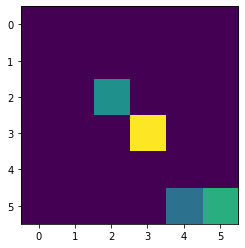

<IPython.core.display.Javascript object>

14
125


In [162]:
env = Gridworld()
obs = env.reset()
cumulative_reward = 0
from google.colab import widgets
output_grid = widgets.Grid(1,1)
for i in range(len(optimal_action)):
  action = optimal_action[i]
  grid = np.zeros((6,6))
  reward,position  = env.step(action)
  cumulative_reward += reward
  env.timesteps += 1
  with output_grid.output_to(0,0):
    output_grid.clear_cell()
    env.render()
  time.sleep(0.5)
  if (position == terminal_pos).all():
    break 
print(env.timesteps)
print(cumulative_reward)

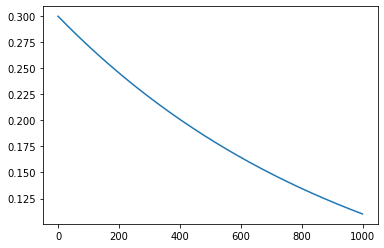

In [160]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(range(1000), graph_e)

[85, 30, 100, 175, 25, 90, 0, 105, 25, 120, 0, 55, 50, 40, 90, 75, 15, 0, 50, 0, 15, 50, 105, 45, 190, 75, 0, 75, 65, 25, 50, 15, 40, 45, 25, 115, 30, 15, 120, 115, 90, 40, 75, 0, 25, 25, 25, 65, 30, 75, 50, 140, 15, 55, 75, 70, 50, 65, 15, 15, 100, 25, 50, 120, 75, 50, 55, 75, 50, 0, 95, 80, 50, 50, 40, 65, 90, 80, 125, 75, 65, 95, 125, 25, 45, 25, 135, 60, 70, 50, 210, 0, 90, 50, 0, 50, 65, 45, 230, 40, 205, 0, 0, 25, 15, 25, 25, 100, 40, 190, 75, 15, 15, 50, 50, 65, 125, 0, 140, 15, 80, 0, 205, 30, 115, 120, 0, 40, 15, 75, 0, 15, 180, 150, 60, 50, 50, 30, 45, 15, 25, 40, 15, 45, 80, 65, 100, 0, 50, 40, 25, 115, 125, 40, 25, 40, 50, 55, 15, 125, 115, 15, 50, 0, 200, 0, 50, 65, 50, 65, 25, 0, 95, 125, 80, 50, 115, 75, 150, 50, 15, 125, 30, 30, 50, 55, 15, 100, 25, 190, 50, 65, 125, 25, 265, 75, 45, 25, 65, 40, 125, 100, 0, 15, 25, 0, 65, 30, 70, 0, 115, 205, 50, 15, 0, 65, 75, 115, 225, 50, 15, 0, 175, 80, 80, 15, 65, 175, 15, 50, 115, 25, 120, 120, 25, 0, 40, 0, 25, 25, 75, 115, 90, 

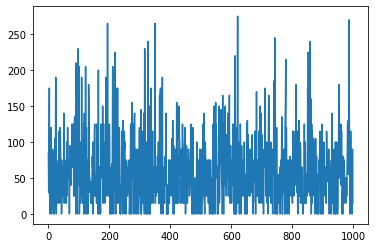

In [161]:
plt.plot(range(1000), reward_graph)
print(reward_graph)